Libraries importation

In [123]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

API endpoints

In [124]:
KRAKEN_API = "https://api.kraken.com/0/public/Ticker?pair=SOLUSDT"

BINANCE_API = "https://api.binance.com/api/v3/ticker/price?symbol=SOLUSDT"

Function to retrieve the price data on Binance and Kraken two CEX to start (AMM are a bit more complicated to handle)

In [125]:
def get_kraken_price():
    """Retrieve the price of the SOL/USDT pair from the Kraken API."""
    try:
        response = requests.get(KRAKEN_API, timeout=10)
        response.raise_for_status()
        data = response.json()
        price = float(data['result']['SOLUSDT']['c'][0])
        return {"SOLUSDT": price}
    except requests.exceptions.RequestException as e:
        print(f"Error when connecting to the Kraken API : {e}")
        return None

In [126]:
def get_binance_price():
    """Retrieve the price of the SOL/USDT pair from the Binance API."""
    try:
        response = requests.get(BINANCE_API, timeout=10)
        response.raise_for_status()
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        print(f"Error when connecting to the Binance API : {e}")
        return None


In [153]:
binance_price = get_binance_price()
print(binance_price)

{'symbol': 'SOLUSDT', 'price': '235.77000000'}


In [154]:
kraken_price = get_kraken_price()
print(kraken_price)

{'SOLUSDT': 235.6}


Function to identify an arbitrage opportunity

In [156]:
def find_arbitrage_opportunities(kraken_price, binance_price):
    """Identify arbitrage opportunities between the Kraken and Binance exchanges."""
    opportunities = []
    kraken_price = float(kraken_price["SOLUSDT"])
    binance_price = float(binance_price["price"])
    
    if binance_price > kraken_price:
        opportunities.append({
            "pair": "SOL/USDT",
            "buy_exchange": "Kraken",
            "sell_exchange": "Binance",
            "buy_price": kraken_price,
            "sell_price": binance_price,
            "profit": binance_price - kraken_price,
            "timestamp": datetime.now()
        })
    elif binance_price < kraken_price:
        opportunities.append({
            "pair": "SOL/USDT",
            "buy_exchange": "Binance",
            "sell_exchange": "Kraken",
            "buy_price": binance_price,
            "sell_price": kraken_price,
            "profit": kraken_price - binance_price,
            "timestamp": datetime.now()
        })

    return opportunities

Function to retrieve the data and to save them in a CSV file

In [159]:
def main():
    historical_data = []
    fees_binance = 0.001
    fees_kraken = 0.004
    start_date = datetime.now() - timedelta(hours=24)
    end_date = datetime.now()
    account = 100

    cumulative_pnl = 0
    payoff_list = []
    pnl_list = []
    timestamps = []
    number_of_trades = 0
    list_of_fees = []
    list_of_profits = []

    while start_date < end_date:
        print(f"Fetching data for {start_date}...")

        binance_price = get_binance_price()
        kraken_price = get_kraken_price()

        opportunities = find_arbitrage_opportunities(kraken_price, binance_price)

        for opportunity in opportunities:
            buy_price = opportunity["buy_price"] 
            sell_price = opportunity["sell_price"] 
            profit_before_fees = opportunity["profit"] * account
            list_of_profits += [profit_before_fees]

            total_fees = account*(fees_binance+fees_kraken)
            
            list_of_fees += [total_fees]
            
            if profit_before_fees > total_fees:
                number_of_trades += 1
                payoff = profit_before_fees * account
                payoff_list.append(payoff)

                profit_after_fees = profit_before_fees - total_fees
                cumulative_pnl += profit_after_fees
                pnl_list.append(cumulative_pnl)

                historical_data.append({
                    "timestamp": opportunity["timestamp"],
                    "buy_at": buy_price,
                    "sell_at": sell_price,
                    "profit_before_fees": profit_before_fees,
                    "profit_after_fees": profit_after_fees,
                    "cumulative_pnl": cumulative_pnl
                })
                timestamps.append(opportunity["timestamp"])
        
        start_date += timedelta(minutes=1)

    df = pd.DataFrame(historical_data)
    df.to_csv("arbitrage_opportunities.csv", index=False)
    print("Data saved to arbitrage_opportunities.csv")

    if len(timestamps) == len(payoff_list) == len(pnl_list):
        plt.figure(figsize=(10, 6))
        plt.plot(timestamps, pnl_list, label="PNL", color='b')
        plt.plot(timestamps, payoff_list, label="Payoff", color='r', linestyle='--')

        plt.title("Payoff and PNL per transaction")
        plt.xlabel("Temps")
        plt.ylabel("Valeur")
        plt.grid(True)
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("Error: The lengths of timestamps, payoff_list, and pnl_list do not match.")
    print(f"Number of trades: {number_of_trades}")
    print(f"List of profits: {list_of_profits}")
    print(f"List of fees: {list_of_fees}")
    print(f"The PNL at the end of the day is: {cumulative_pnl}")


Fetching data for 2025-01-26 02:41:23.616394...
Fetching data for 2025-01-26 02:42:23.616394...
Fetching data for 2025-01-26 02:43:23.616394...
Fetching data for 2025-01-26 02:44:23.616394...
Fetching data for 2025-01-26 02:45:23.616394...
Fetching data for 2025-01-26 02:46:23.616394...
Fetching data for 2025-01-26 02:47:23.616394...
Fetching data for 2025-01-26 02:48:23.616394...
Fetching data for 2025-01-26 02:49:23.616394...
Fetching data for 2025-01-26 02:50:23.616394...
Fetching data for 2025-01-26 02:51:23.616394...
Fetching data for 2025-01-26 02:52:23.616394...
Fetching data for 2025-01-26 02:53:23.616394...
Fetching data for 2025-01-26 02:54:23.616394...
Fetching data for 2025-01-26 02:55:23.616394...
Fetching data for 2025-01-26 02:56:23.616394...
Fetching data for 2025-01-26 02:57:23.616394...
Fetching data for 2025-01-26 02:58:23.616394...
Fetching data for 2025-01-26 02:59:23.616394...
Fetching data for 2025-01-26 03:00:23.616394...
Fetching data for 2025-01-26 03:01:23.61

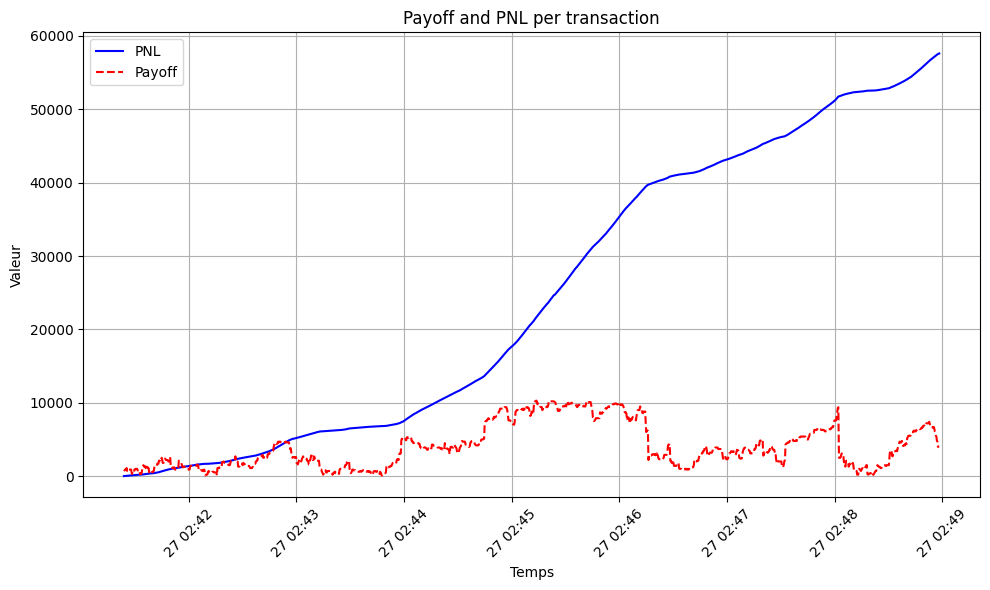

Number of trades: 1436
List of profits: [6.999999999999318, 8.00000000000125, 9.000000000000341, 9.000000000000341, 9.999999999999432, 10.999999999998522, 6.999999999999318, 6.999999999999318, 6.000000000000227, 9.000000000000341, 9.000000000000341, 9.000000000000341, 9.000000000000341, 9.000000000000341, 3.999999999999204, 3.0000000000001137, 3.999999999999204, 3.0000000000001137, 5.000000000001137, 9.000000000000341, 9.000000000000341, 9.999999999999432, 9.999999999999432, 9.999999999999432, 9.999999999999432, 6.999999999999318, 3.0000000000001137, 3.0000000000001137, 3.999999999999204, 3.999999999999204, 3.0000000000001137, 3.0000000000001137, 5.000000000001137, 9.999999999999432, 12.999999999999545, 15.000000000000568, 12.999999999999545, 12.999999999999545, 12.999999999999545, 10.999999999998522, 15.000000000000568, 15.999999999999659, 12.000000000000455, 10.999999999998522, 10.999999999998522, 3.999999999999204, 3.999999999999204, 5.000000000001137, 3.999999999999204, 5.000000000

In [160]:
main()